In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#

In [ ]:
data=pd.read_csv('gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data.isnull().sum()#Check for data cleaning purposes

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
data.tail() #We have data untill 2018

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
data.shape

(2290, 6)

In [ ]:
#Getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
corelation=data.corr()

<Axes: >

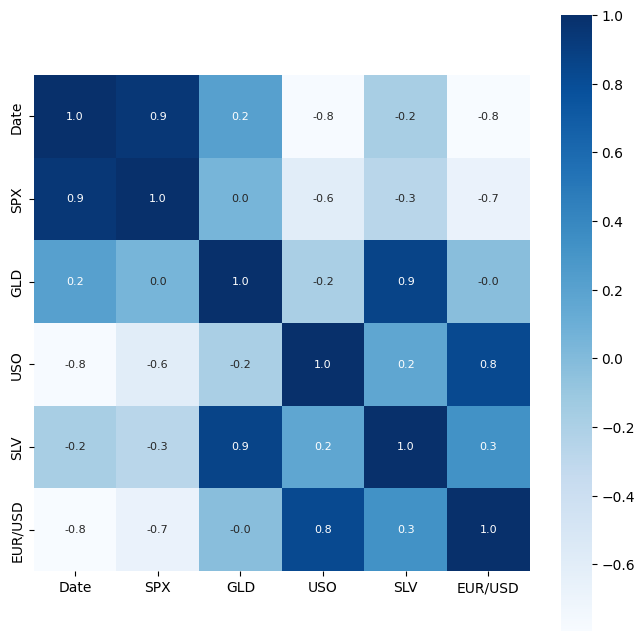

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of Gold
print(corelation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-3c4bef9379c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

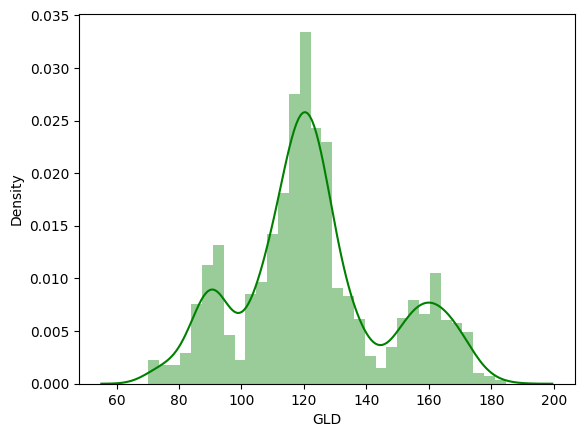

In [ ]:
#Cheking the distribution of Gold Price
sns.distplot(data['GLD'],color='green')
#

# **Splitting the Fetures and Target**

In [ ]:
X=data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#Model
model=RandomForestRegressor(n_estimators=100)


# **Model Training**

In [ ]:
#Training model
model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Let's make Predictions
test_data_prediction=model.predict(X_test)
print(test_data_prediction)

[168.7341991   81.71769994 116.32209993 127.71180095 120.64050133
 154.65809765 149.90979839 126.05050033 117.53929864 125.89050108
 116.67280123 171.40480121 141.63519873 167.9167978  115.27930002
 117.55250064 138.77640305 170.06920077 159.18270303 160.07709935
 155.16329999 124.86500014 176.22289973 157.05760285 125.22650043
  94.0191999   77.74750015 120.30310001 119.11149967 167.46030017
  88.31160005 125.12689992  90.74550047 117.72770022 121.19819887
 136.03900073 115.48130114 115.20720086 148.3429004  107.37690129
 103.93600232  87.280698   126.51860063 117.94119981 154.68759875
 119.63149985 108.40319964 108.22619812  93.26480079 127.17619766
  74.91610052 113.73459941 121.31520009 111.24309858 118.79949883
 120.54599921 158.80309975 169.51520019 146.92349698  85.82239862
  94.20600017  86.81169905  90.47890004 118.80120087 126.44670085
 127.55230013 169.66990042 122.29389925 117.43189883  98.50299995
 167.51080054 143.21309864 132.35840306 121.27850204 121.4899996
 119.787300

In [ ]:
error=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error)

R squared error: 0.9887393977921448


Text(0.5, 0, 'Number of values')

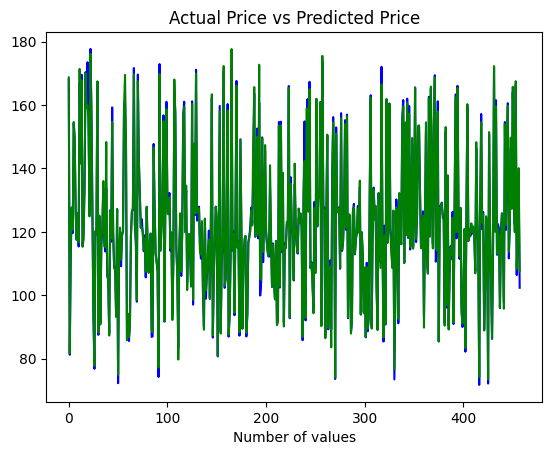

In [ ]:
#Comparison between Actual and Predicted Values
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')

In [ ]:
Actual_Value=list(Y_test)
Predicted_Value=list(test_data_prediction)
df=pd.DataFrame({'Actual Value':Actual_Value,'Predicted Value':Predicted_Value})
df

,Actual Value,Predicted Value
0,168.020004,168.734199
1,81.230003,81.717700
2,112.320000,116.322100
3,127.589996,127.711801
4,119.620003,120.640501
...,...,...
453,166.380005,167.537099
454,106.379997,108.387899
455,122.239998,121.605499
456,133.830002,140.094702
